Forecasting!! -360DIGITMG

Forecasting is the process of making predictions of the future based on past and present data and analysis of trends.Trending or predicting a continuation based on the shape of the line generated by plotting past results.

Forecasting problem 3. A plastics manufacturing plant has recorded their monthly sales data from 1949 to 1953. Perform forecasting on the data and bring out insights from it and forecast the sale for the next year.

Business objective: Forecast the future sales of plastics manufacturing plant for next year.

In [2]:
import pandas as pd                      # for Data Manipulation
import numpy as np                       # for Mathematical calculations
import matplotlib.pyplot as plt          # for Data Visualization

In [3]:
plastic = pd.read_csv("D:/Datascience/Assignment/27.Forecasting - Time Series/PlasticSales.csv")

In [4]:
plastic['months']= 0    #Filling elements in column "month" with first three letters of column "month"
for i in range(60):
    p = plastic["Month"][i]
    plastic['months'][i]= p[0:3]

<ipython-input-4-a6369e114170>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plastic['months'][i]= p[0:3]
C:\Users\Naveen\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [5]:
month_dummies = pd.DataFrame(pd.get_dummies(plastic['months'])) # creating dummies for "month" column
plastic1 = pd.concat([plastic,month_dummies],axis = 1)          # concating plastic dataframe and month_dummies, creating newdataframe plastic1

In [7]:
plastic1["t"] = np.arange(1,61)                                # creating new column t
plastic1["t_squared"] = plastic1["t"]*plastic1["t"]            # crearing new column "t_squared" by squaring elements of "t" column       
plastic1["log_pas"] = np.log(plastic1["Sales"])                # creating new column "log_pas" by taking log on "sales" column elements

<AxesSubplot:>

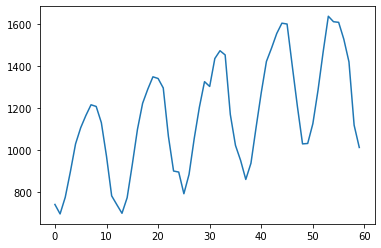

In [8]:
plastic1.Sales.plot()

In [10]:
#spliting the data into train and test by consider last 12 months as test data
Train = plastic1.head(48)
Test = plastic1.tail(12)

In [11]:
# linear
import statsmodels.formula.api as smf 
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

260.93781425111206

In [12]:
# Exponential
Exp = smf.ols('log_pas~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

268.69383850025605

In [14]:
# Quadratic
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

297.4067097272056

In [15]:
# Additive seasonality
add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

235.60267356646492

In [16]:
# Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

218.1938758489836

In [17]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_pas~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

239.65432143120876

In [18]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_pas~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

160.68332947193454

In [19]:
# Comparing all model rmse values
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,260.937814
1,rmse_Exp,268.693839
2,rmse_Quad,297.406710
3,rmse_add_sea,235.602674
4,rmse_add_sea_quad,218.193876
5,rmse_Mult_sea,239.654321
6,rmse_Mult_add_sea,160.683329


In [25]:
predict_data = pd.read_csv("D:/Datascience/Assignment/27.Forecasting - Time Series/Predict_new.csv")
model_full = smf.ols('log_pas~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=plastic1).fit()
pred_full=model_full.predict(plastic1)
plastic1["pred_full"]=pred_full
residuals=pd.DataFrame(np.array(plastic1["Sales"]-np.array(pred_full)))
pred_new  = pd.Series(model_full.predict(predict_data))
pred_new = np.exp(pred_new)

In [26]:
predict_data["forecasted_sales"] = pred_new

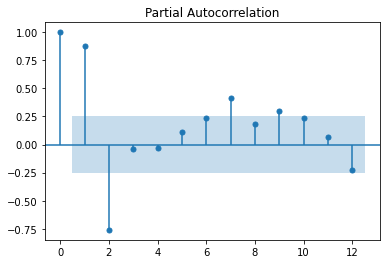

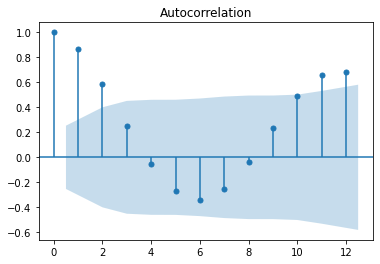

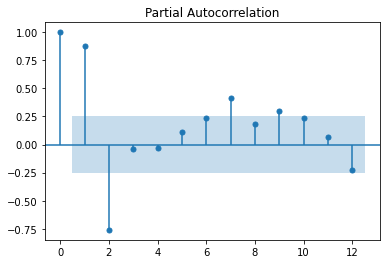

In [27]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals.values.squeeze(), lags=12)
sm.graphics.tsa.plot_pacf(plastic1.Sales.values.squeeze(), lags=12)

In [28]:
from statsmodels.tsa.arima_model import ARIMA
pas=plastic["Sales"]
model=ARIMA(residuals,order=(1,0,0)).fit(transparams=True)
forecasterrors=model.forecast(steps=12)[0]
predict_data["forecasted_sales"] = pd.Series(pred_new)
predict_data["forecasted_errors"] = pd.Series(forecasterrors)
predict_data["improved"] = predict_data["forecasted_sales"]+predict_data["forecasted_errors"]

C:\Users\Naveen\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<AxesSubplot:>

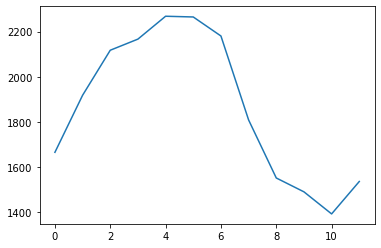

In [29]:
predict_data["forecasted_sales"].plot()